In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as pxp
from matplotlib import rcParams
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [2]:
import warnings
warnings.filterwarnings('ignore')  # disable warnings displayed during plotting

In [3]:
data = pd.read_csv('datasets/customers.csv')

## Describe dataset

In [4]:
data.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data.head(10)

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [6]:
# Drop CustomerID column since it is not needed
data.drop(columns=['CustomerID'], inplace=True)

## Plot the distribution of which

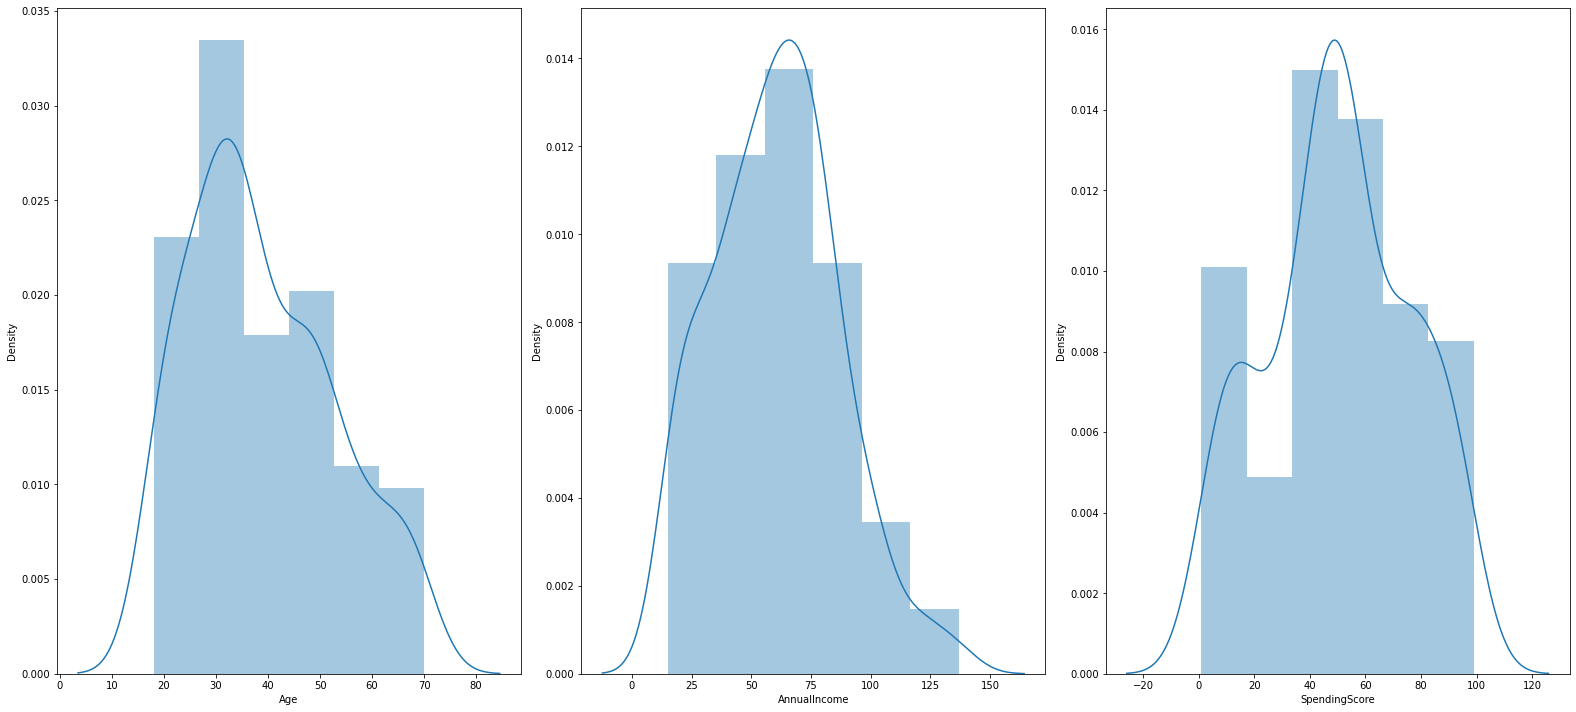

In [7]:
plt.figure(figsize = (22, 10))
plotnum = 1

for cols in ['Age', 'AnnualIncome', 'SpendingScore']:
    if plotnum <= 3:
        axs = plt.subplot(1, 3, plotnum)
        sns.distplot(data[cols], bins=6)
    plotnum += 1
    
plt.tight_layout()
plt.show()

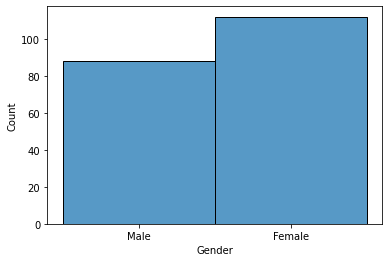

In [8]:
sns.histplot(data['Gender'])
plt.show()

### Prepare dataset combining numeric columns

In [9]:
age_v_spending = data.loc[:, ['Age', 'SpendingScore']]
age_v_income = data.loc[:, ['Age', 'AnnualIncome']]
income_v_spending = data.loc[:, ['AnnualIncome', 'SpendingScore']]

# K-means algorithm

#### Function for plotting for each cluster size
#### -  sum of squared distances to center of cluster - elbow method
#### -  Silhouette Score

In [10]:
def calculate_silhouette(x_input, clusters):
    k_means = KMeans(n_clusters=clusters, init='k-means++')
    label = k_means.fit_predict(x_input)
    # Calculating Silhouette score
    return silhouette_score(x_input, label)

In [11]:
def plot_elbow_method_and_silhouette_score(x_input):
    ssd = []  # sum of squared distances to center of cluster | inertia of cluster
    silhouette_scores = []  # sum of squared distances to center of cluster | inertia of cluster
    k_values = range(2, 11)
    
    for k in k_values:  # iterate through cluster sizes
        k_means = KMeans(n_clusters=k, init='k-means++')
        k_means.fit(x_input)
        ssd.append(k_means.inertia_)
        
        # Silhouette score
        silhouette_score = calculate_silhouette(x_input, k)
        silhouette_scores.append(silhouette_score)
    
    plt.rcParams["figure.figsize"] = (16,8)  # adjust plot size
    fig, ax_silhouette = plt.subplots()
    ax_ssd = ax_silhouette.twinx()
    
    ax_ssd.plot(k_values, ssd, color='black')
    ax_silhouette.plot(k_values, silhouette_scores, color='red')
    
    font_style = {'size': 16}
    
    ax_ssd.set_ylabel("Sum of squared distances to cluster's center", font_style)
    ax_silhouette.set_ylabel("Silhouette score", font_style)
    
    ax_silhouette.set_xlabel("Number of clusters", font_style)
    ax_silhouette.grid(True)
    plt.title('Elbow method and silhouette scores for each cluster size', font_style)

### Plot Elbow Method and Silhouette Score for each data set

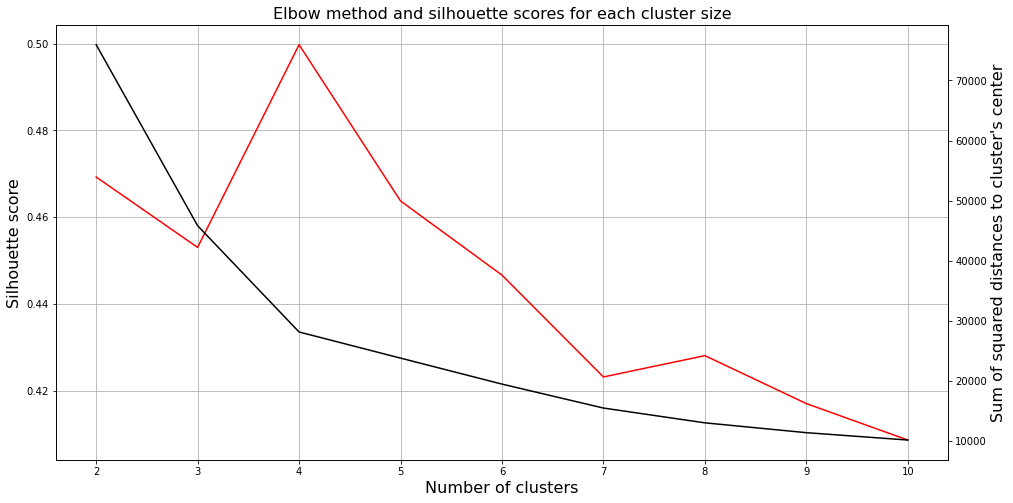

In [12]:
plot_elbow_method_and_silhouette_score(age_v_spending)

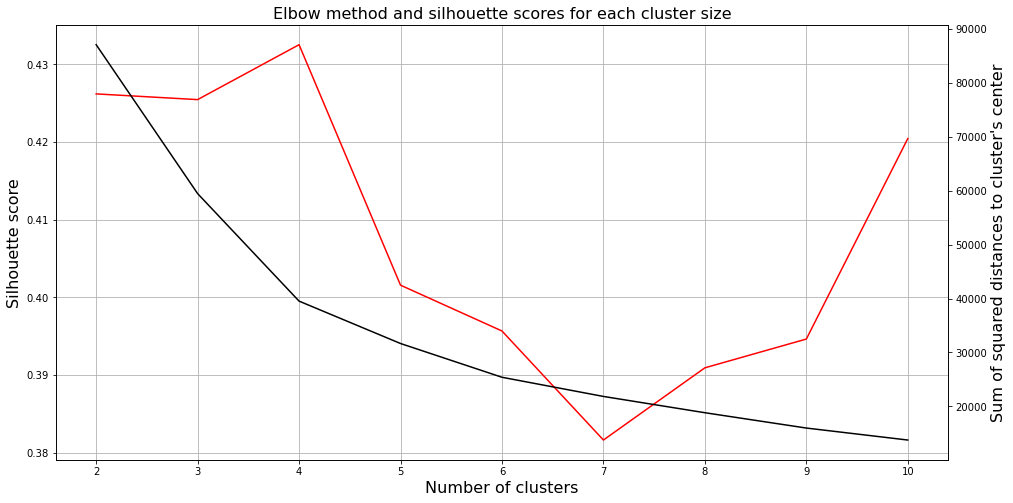

In [13]:
plot_elbow_method_and_silhouette_score(age_v_income)

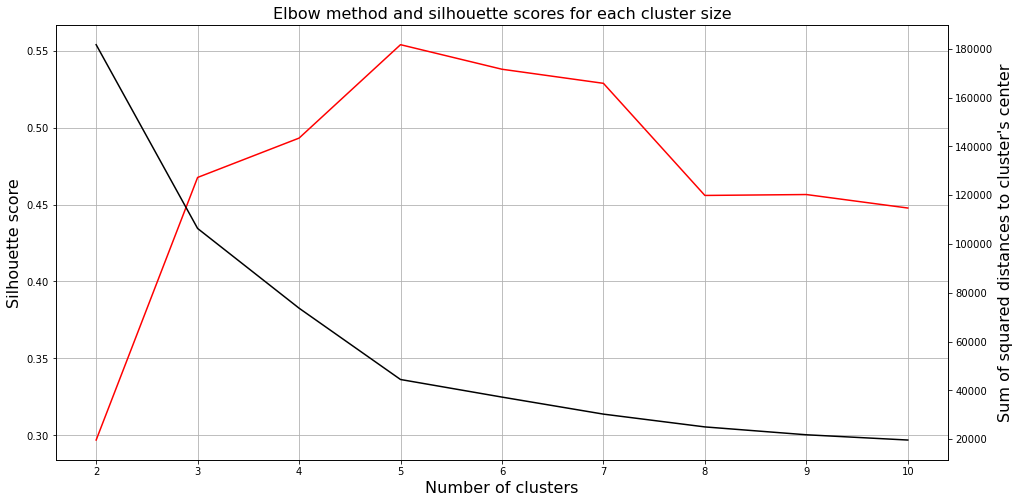

In [14]:
plot_elbow_method_and_silhouette_score(income_v_spending)

To choose the best number of clusters to group the data you choose the number of clusters where Silhouette Score is highest and where the elbow method is visible.
We can see that each data with their best number of clusters:
- age and spending: 4
- age and income: 4
- income and spending: 5

## Plot clusters

In [15]:
def plot_clusters(x_input, cluster_size):
    plt.figure(figsize = (12, 8))
    
    k_means = KMeans(n_clusters=cluster_size, init='k-means++')
    k_means.fit(x_input)
    
    
    columns_names = list(x_input.columns)
    
    x_values = x_input[columns_names[0]]
    y_values = x_input[columns_names[1]]
    plt.scatter(x_values, y_values, c = k_means.labels_, s = 105)
    plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], color = 'red', s = 250)
    plt.title('Clusters of Customers\n', fontsize = 20)
    
    plt.xlabel(columns_names[0])
    plt.ylabel(columns_names[1])
    plt.show()

### Plot clustered data with the best number of clusters choosen before

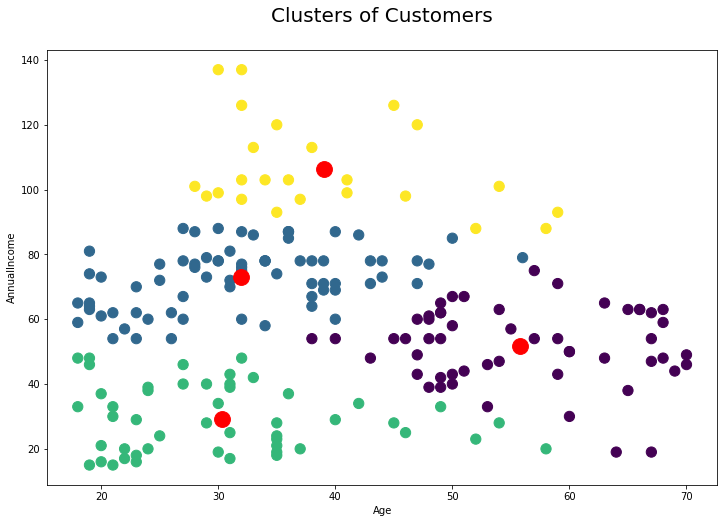

In [16]:
plot_clusters(age_v_income, 4)

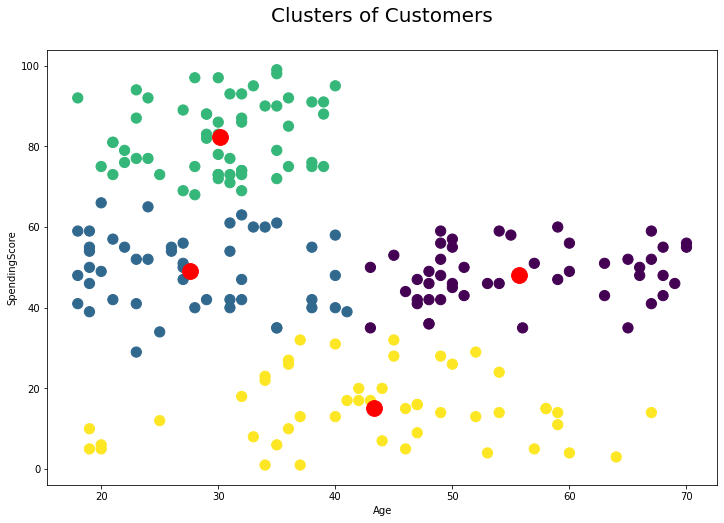

In [17]:
plot_clusters(age_v_spending, 4)

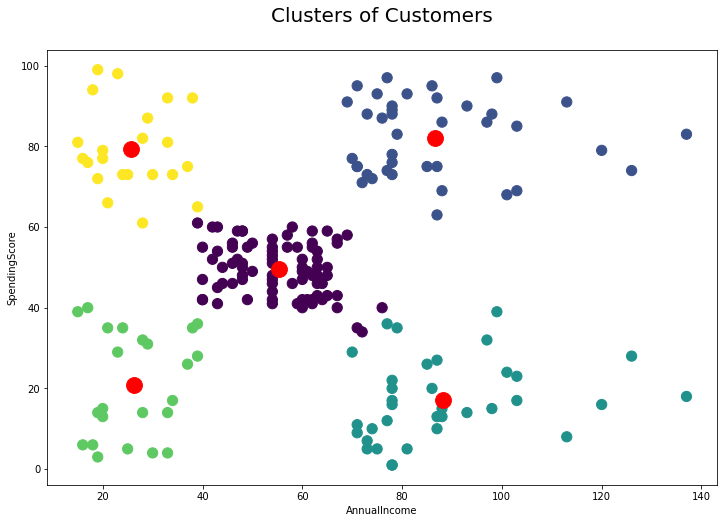

In [18]:
plot_clusters(income_v_spending, 5)

# Hierarchical Agglomerative Clustering 

In [19]:
rcParams['figure.dpi'] = 300  # for higher visualization resolution 

In [20]:
def plot_dendrogram(x_data):
    plt.figure(figsize = (17, 8))

    dendo = dendrogram(linkage(x_data, method = 'ward'))
    plt.title('Dendrogram', fontsize = 15)
    plt.show()

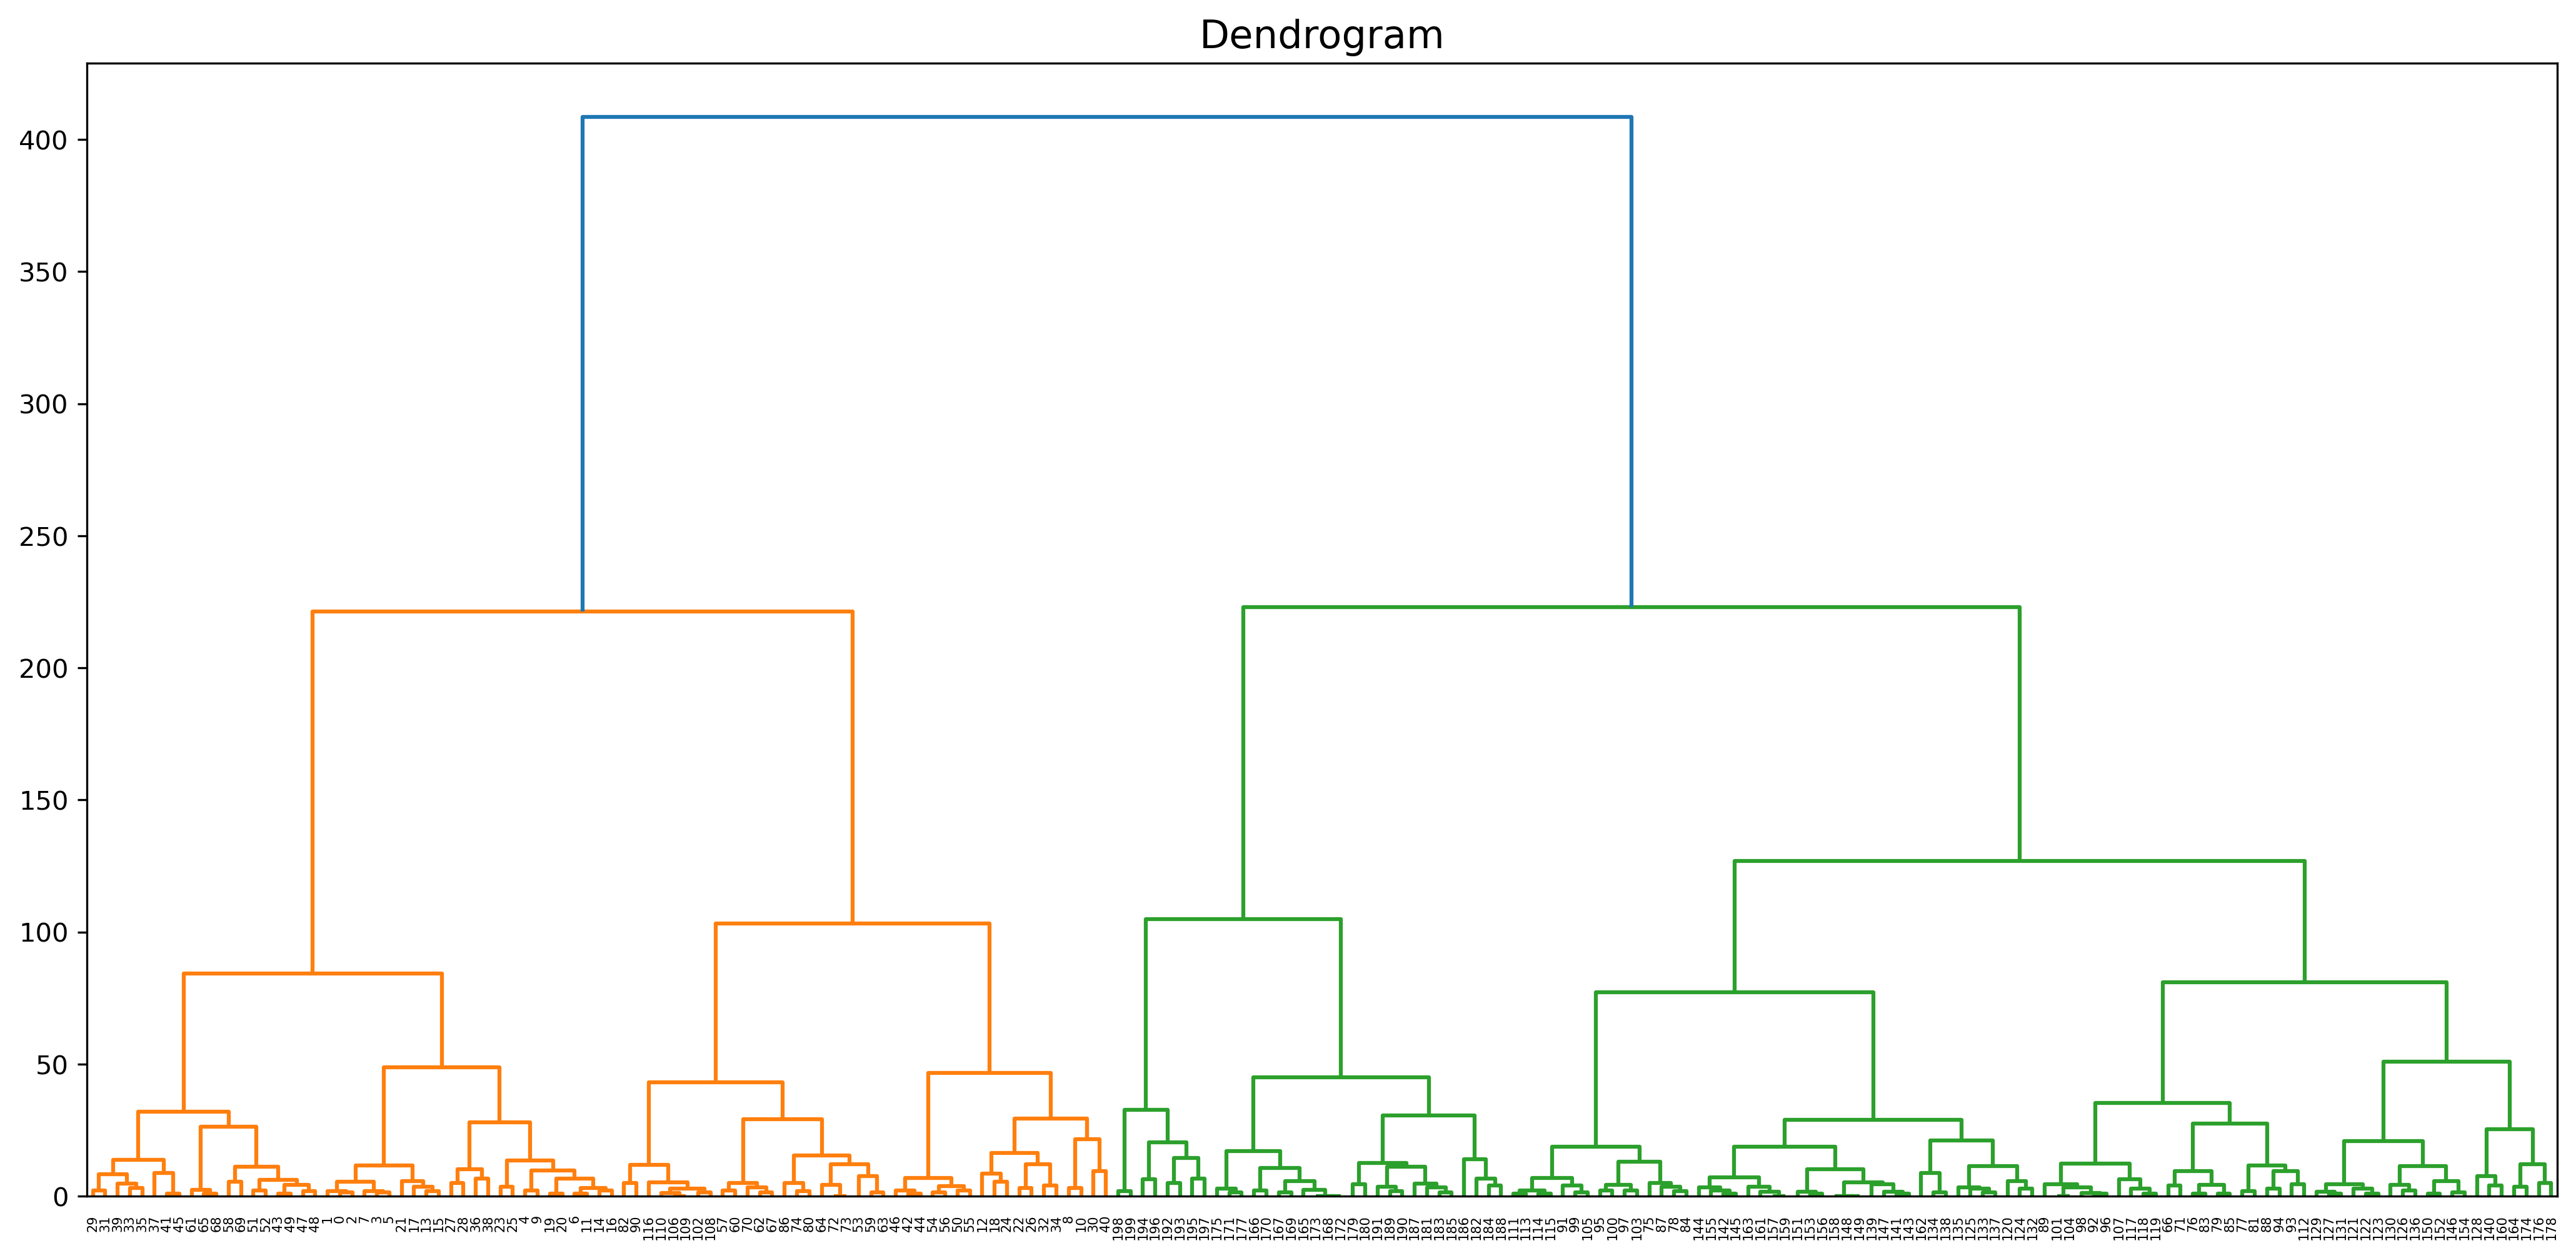

In [21]:
plot_dendrogram(age_v_income)

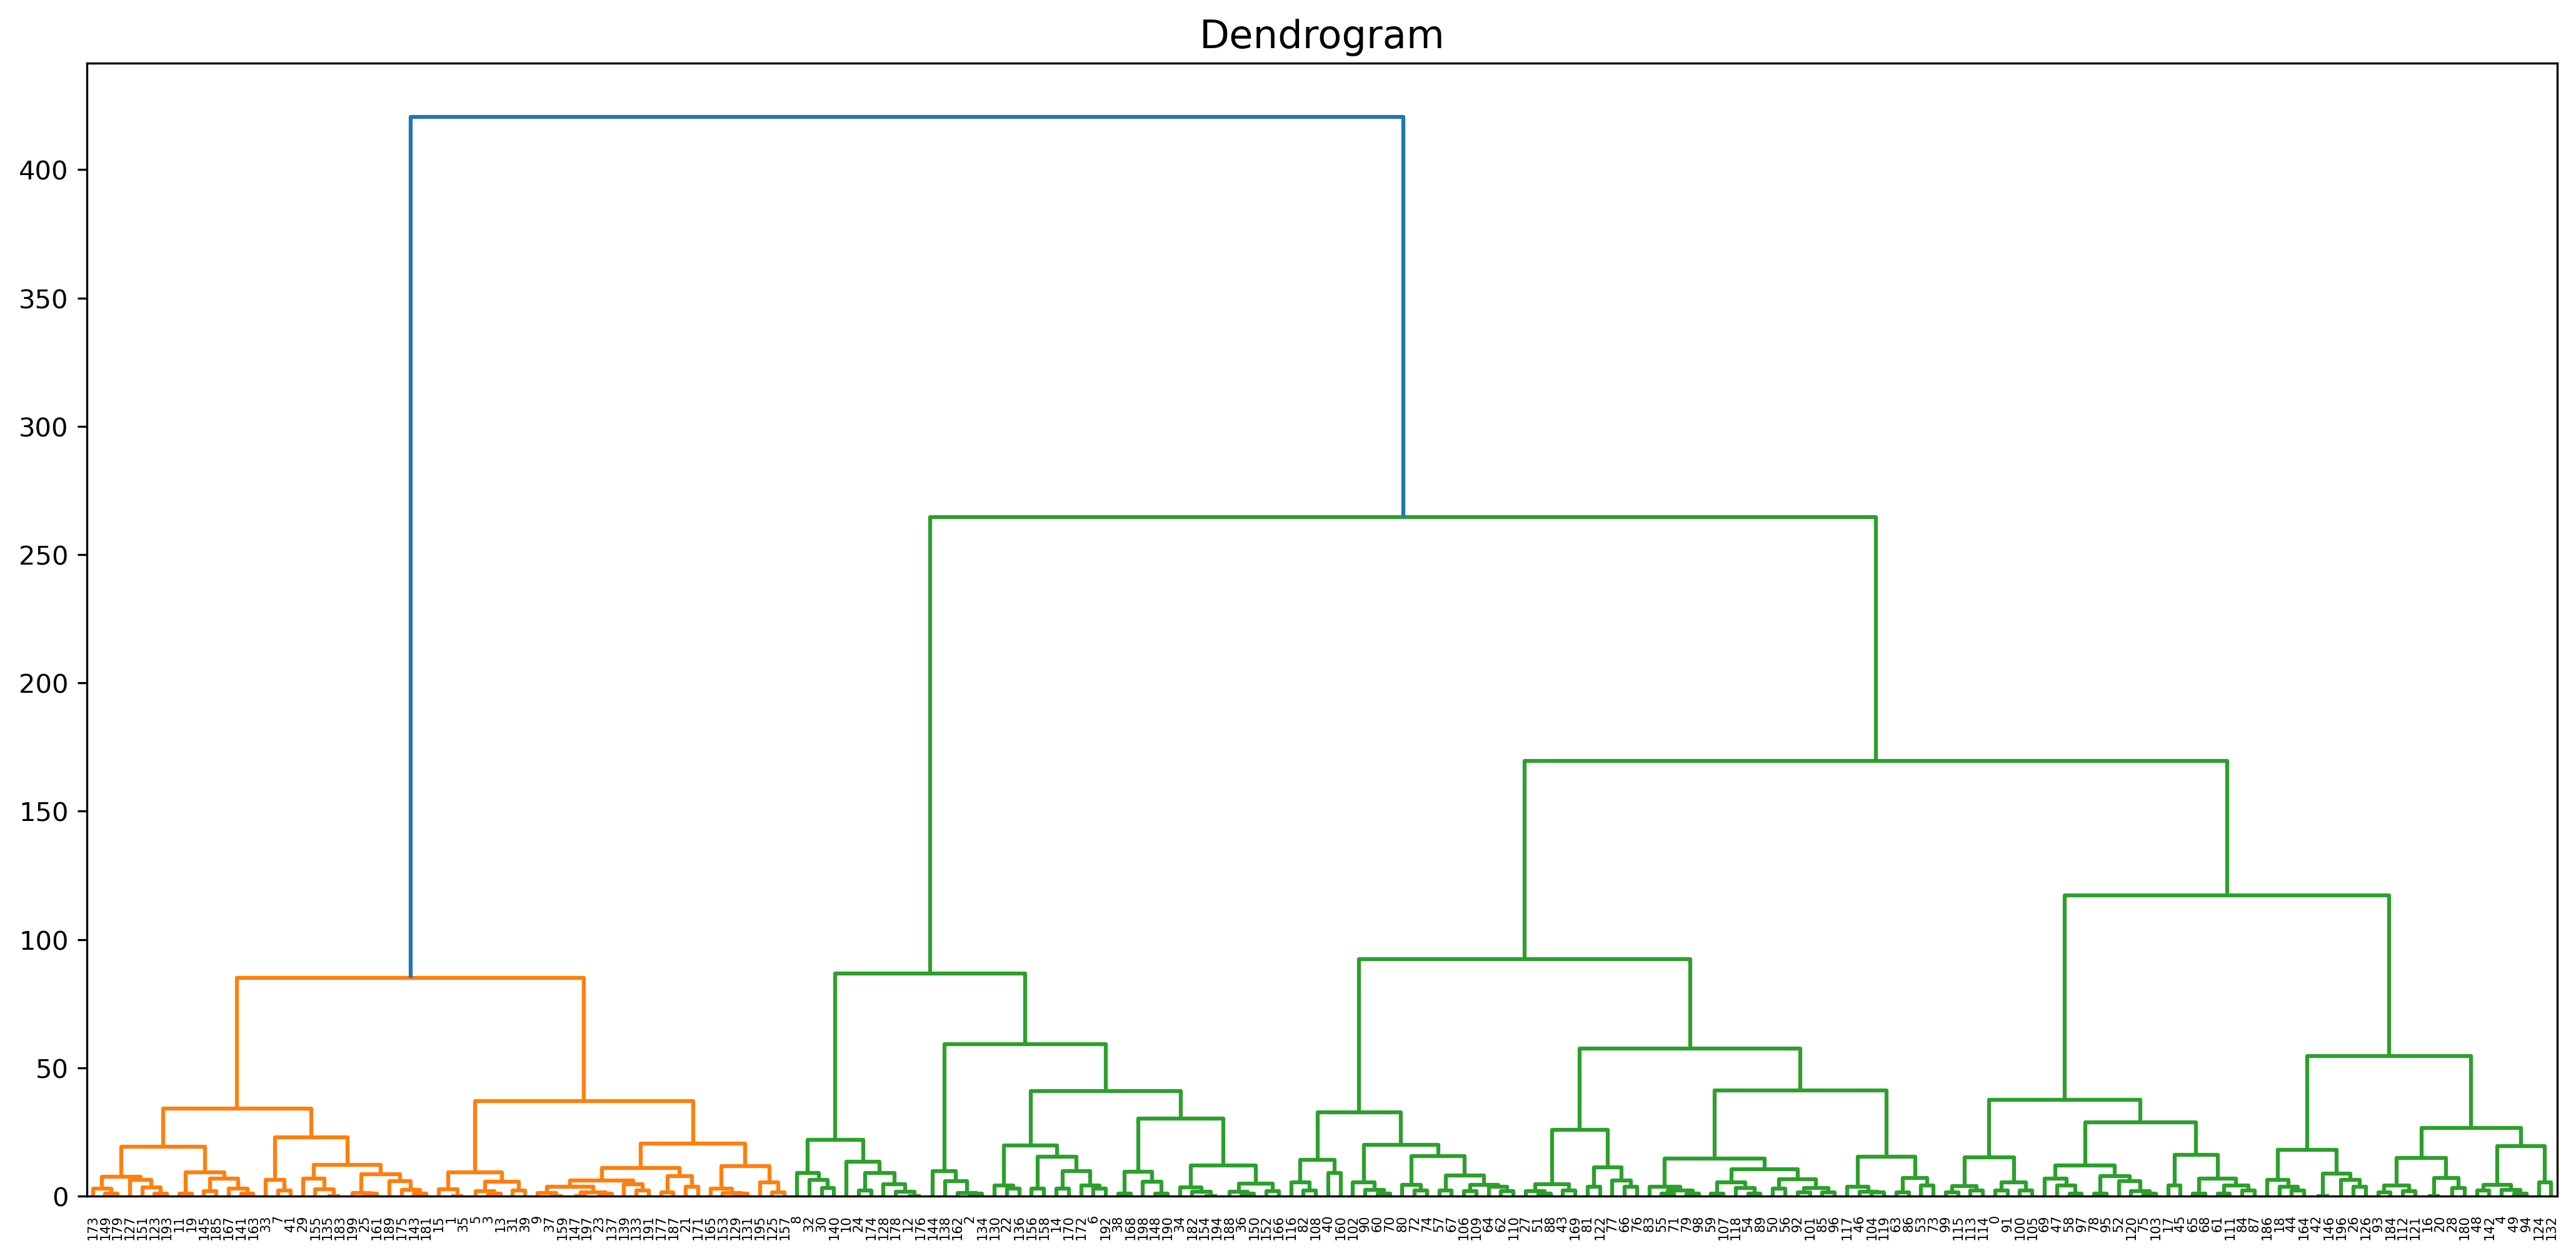

In [22]:
plot_dendrogram(age_v_spending)

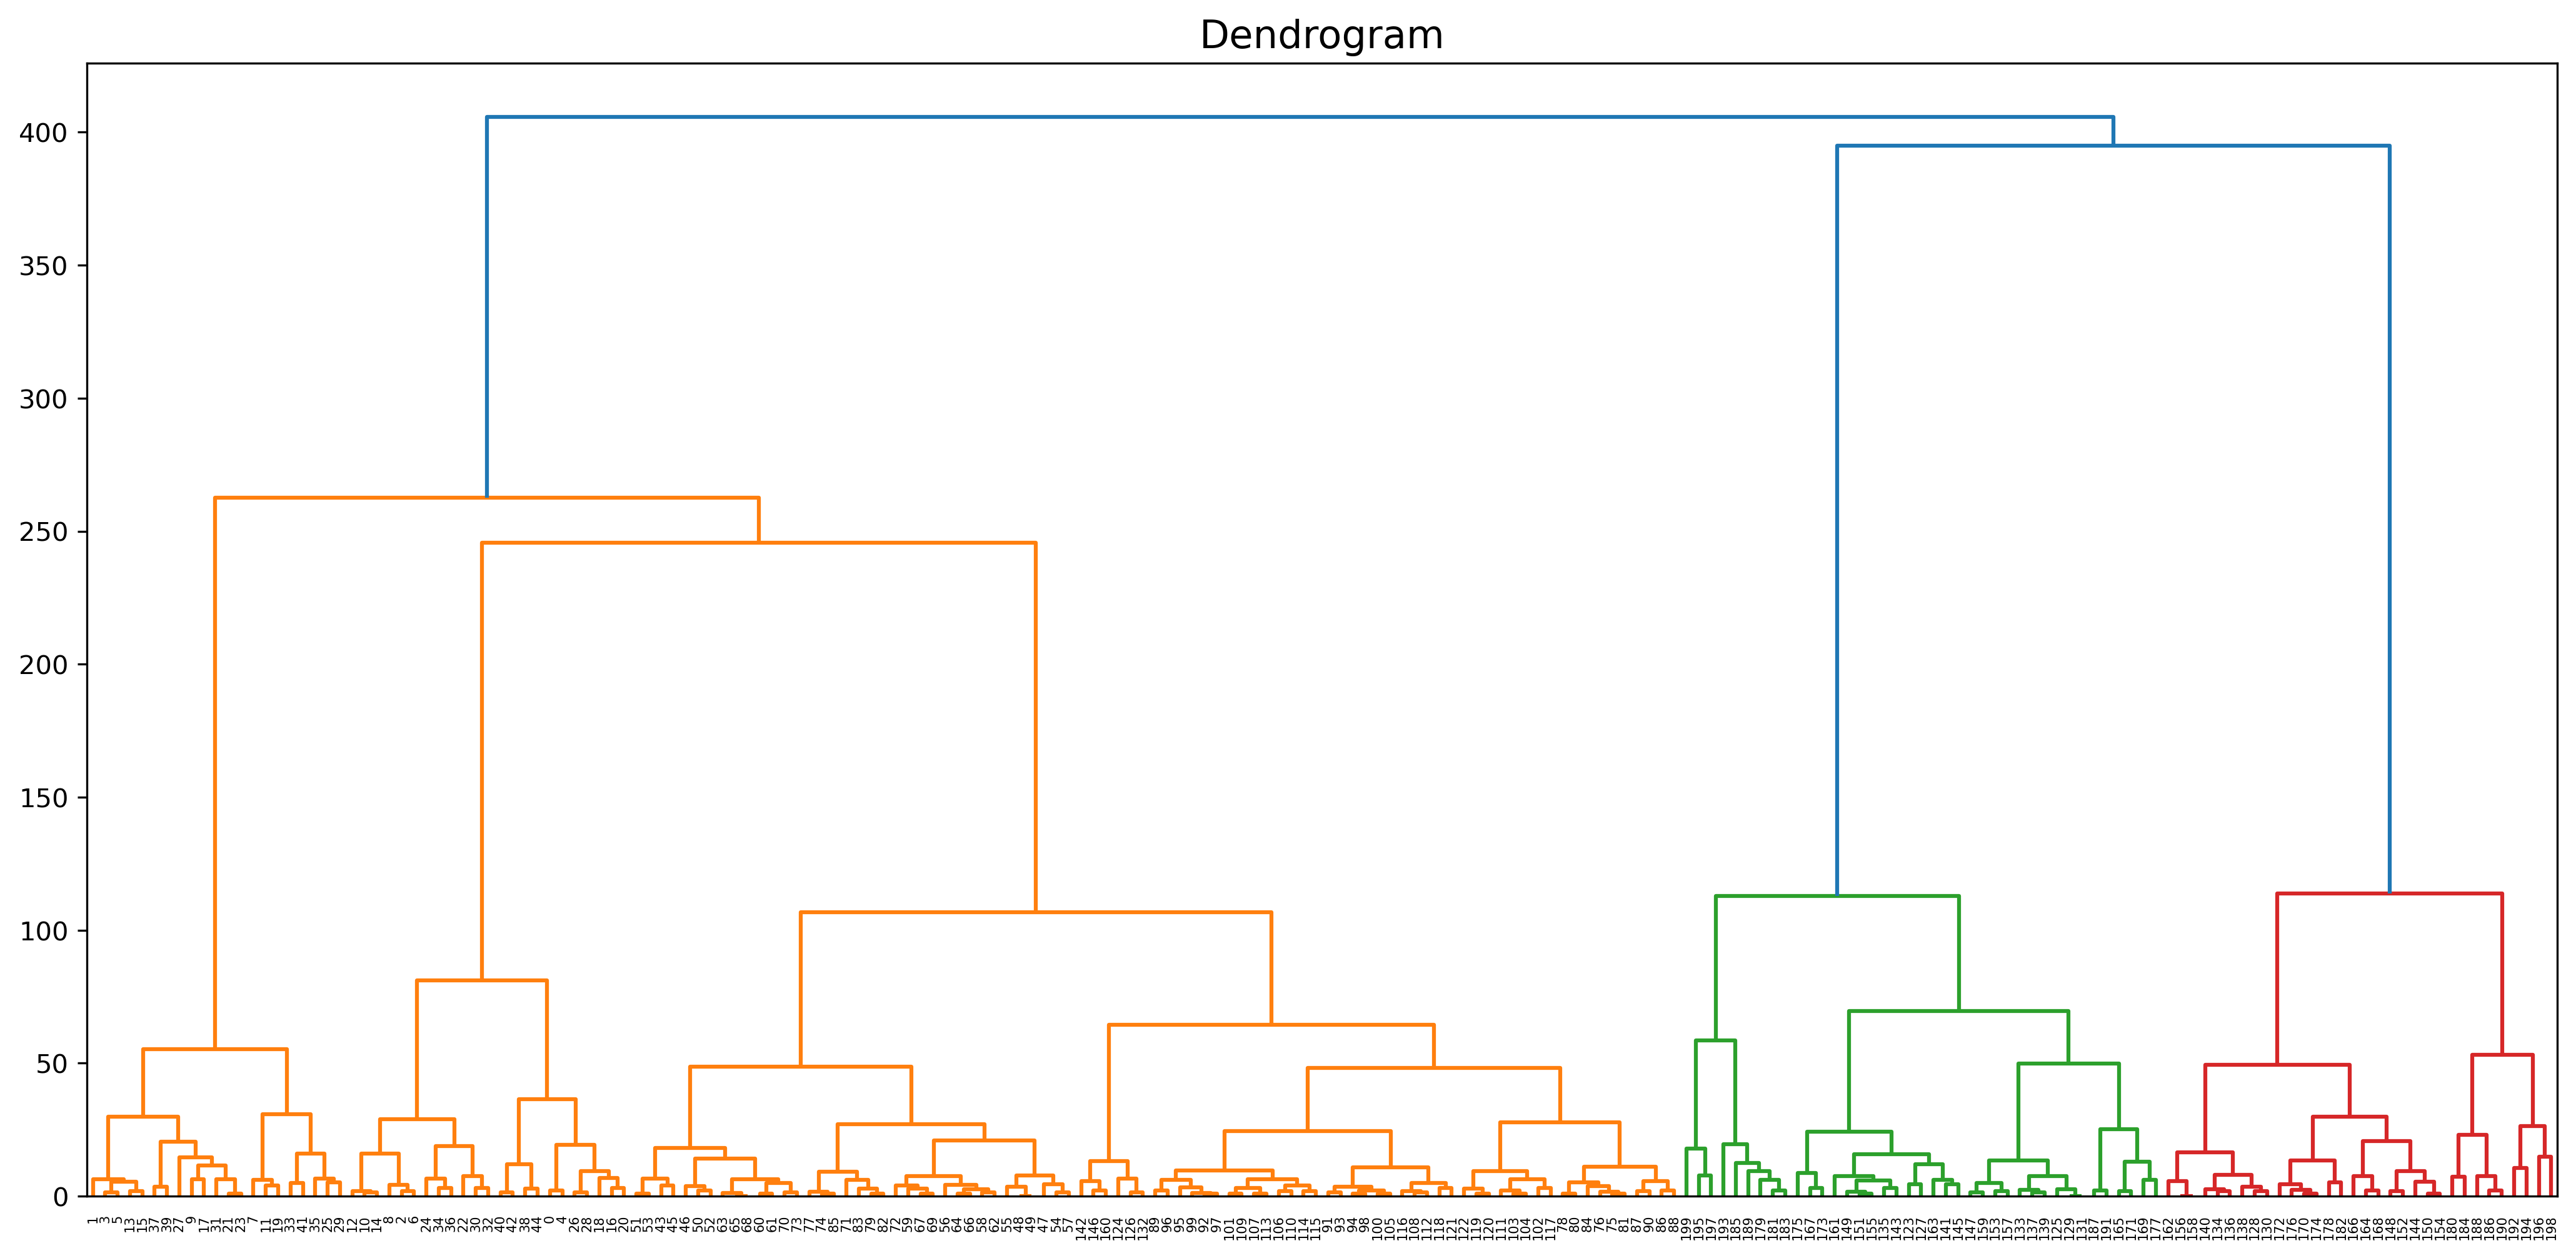

In [23]:
plot_dendrogram(income_v_spending)

### Analyzing dendrograms

To choose the best number of clusters we need to analyze dendrograms ourselves. It might not be clear out of the box.
From looking at dendrograms we can take the following best number of clusters for each data set:
- age and spending: 4
- age and income: 5
- income and spending: 5
So the values differ from the ones chosen by elbow method and silhouette score.

In [52]:
def plot_clusters_hierarchical(data, n_of_clusters):
    agc = AgglomerativeClustering(n_clusters = n_of_clusters, affinity = 'euclidean', linkage = 'ward')
    labels = agc.fit_predict(income_v_spending)
    
    plt.figure(figsize = (8, 4))
    for label in np.unique(labels):
        indices = np.argwhere(labels == label)
        x_values=data.values[indices, 0]
        y_values=data.values[indices, 1]
        plt.scatter(x_values, y_values, label = f'Cluster {label}', s = 30)

    plt.legend(loc = 'best')
    plt.title(f'Clustered data of {data.columns[0]} and {data.columns[1]}\n ', fontsize = 15)
    plt.show()

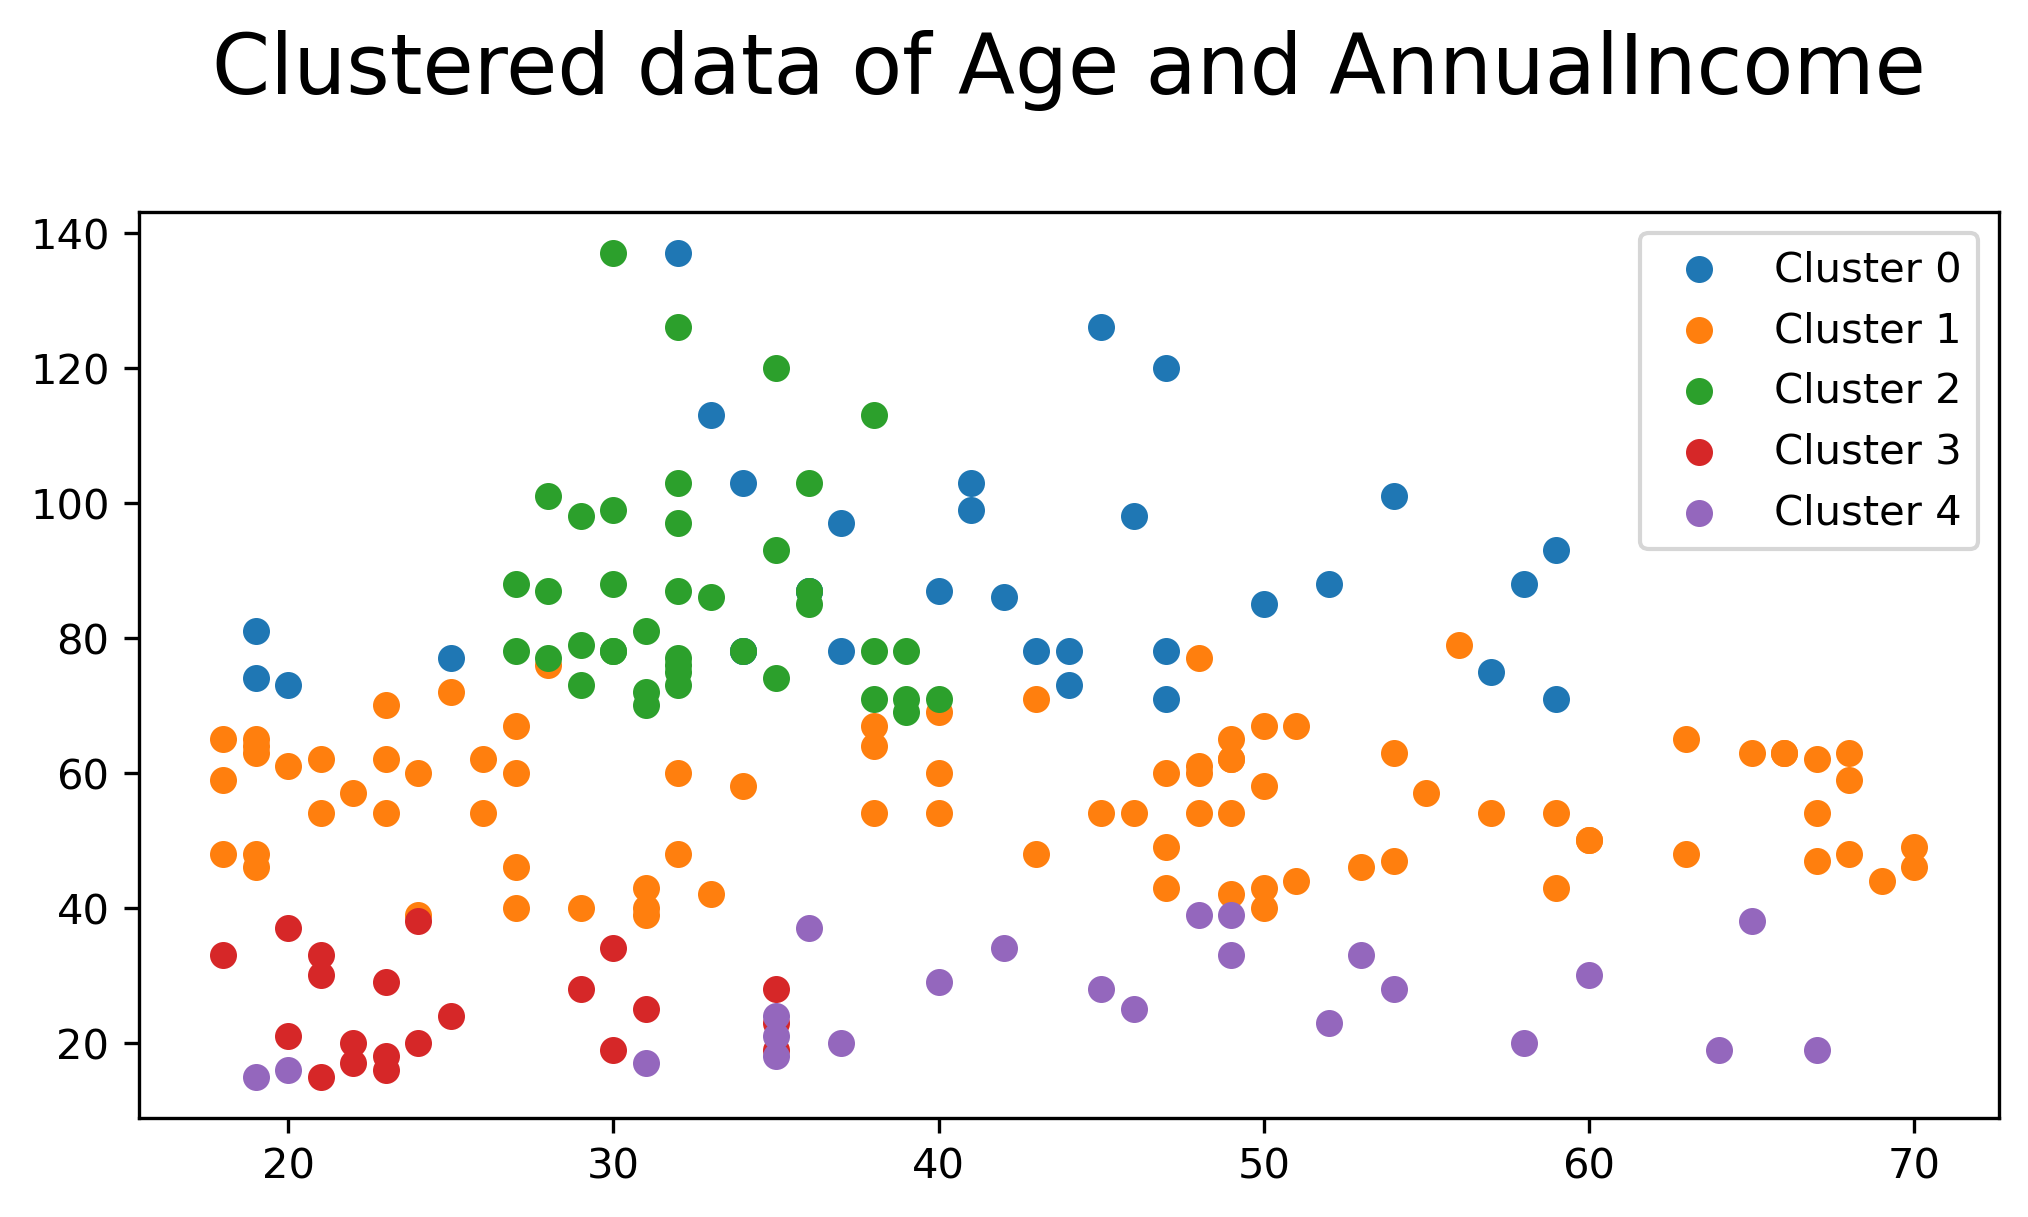

In [62]:
plot_clusters_hierarchical(age_v_income, 5)

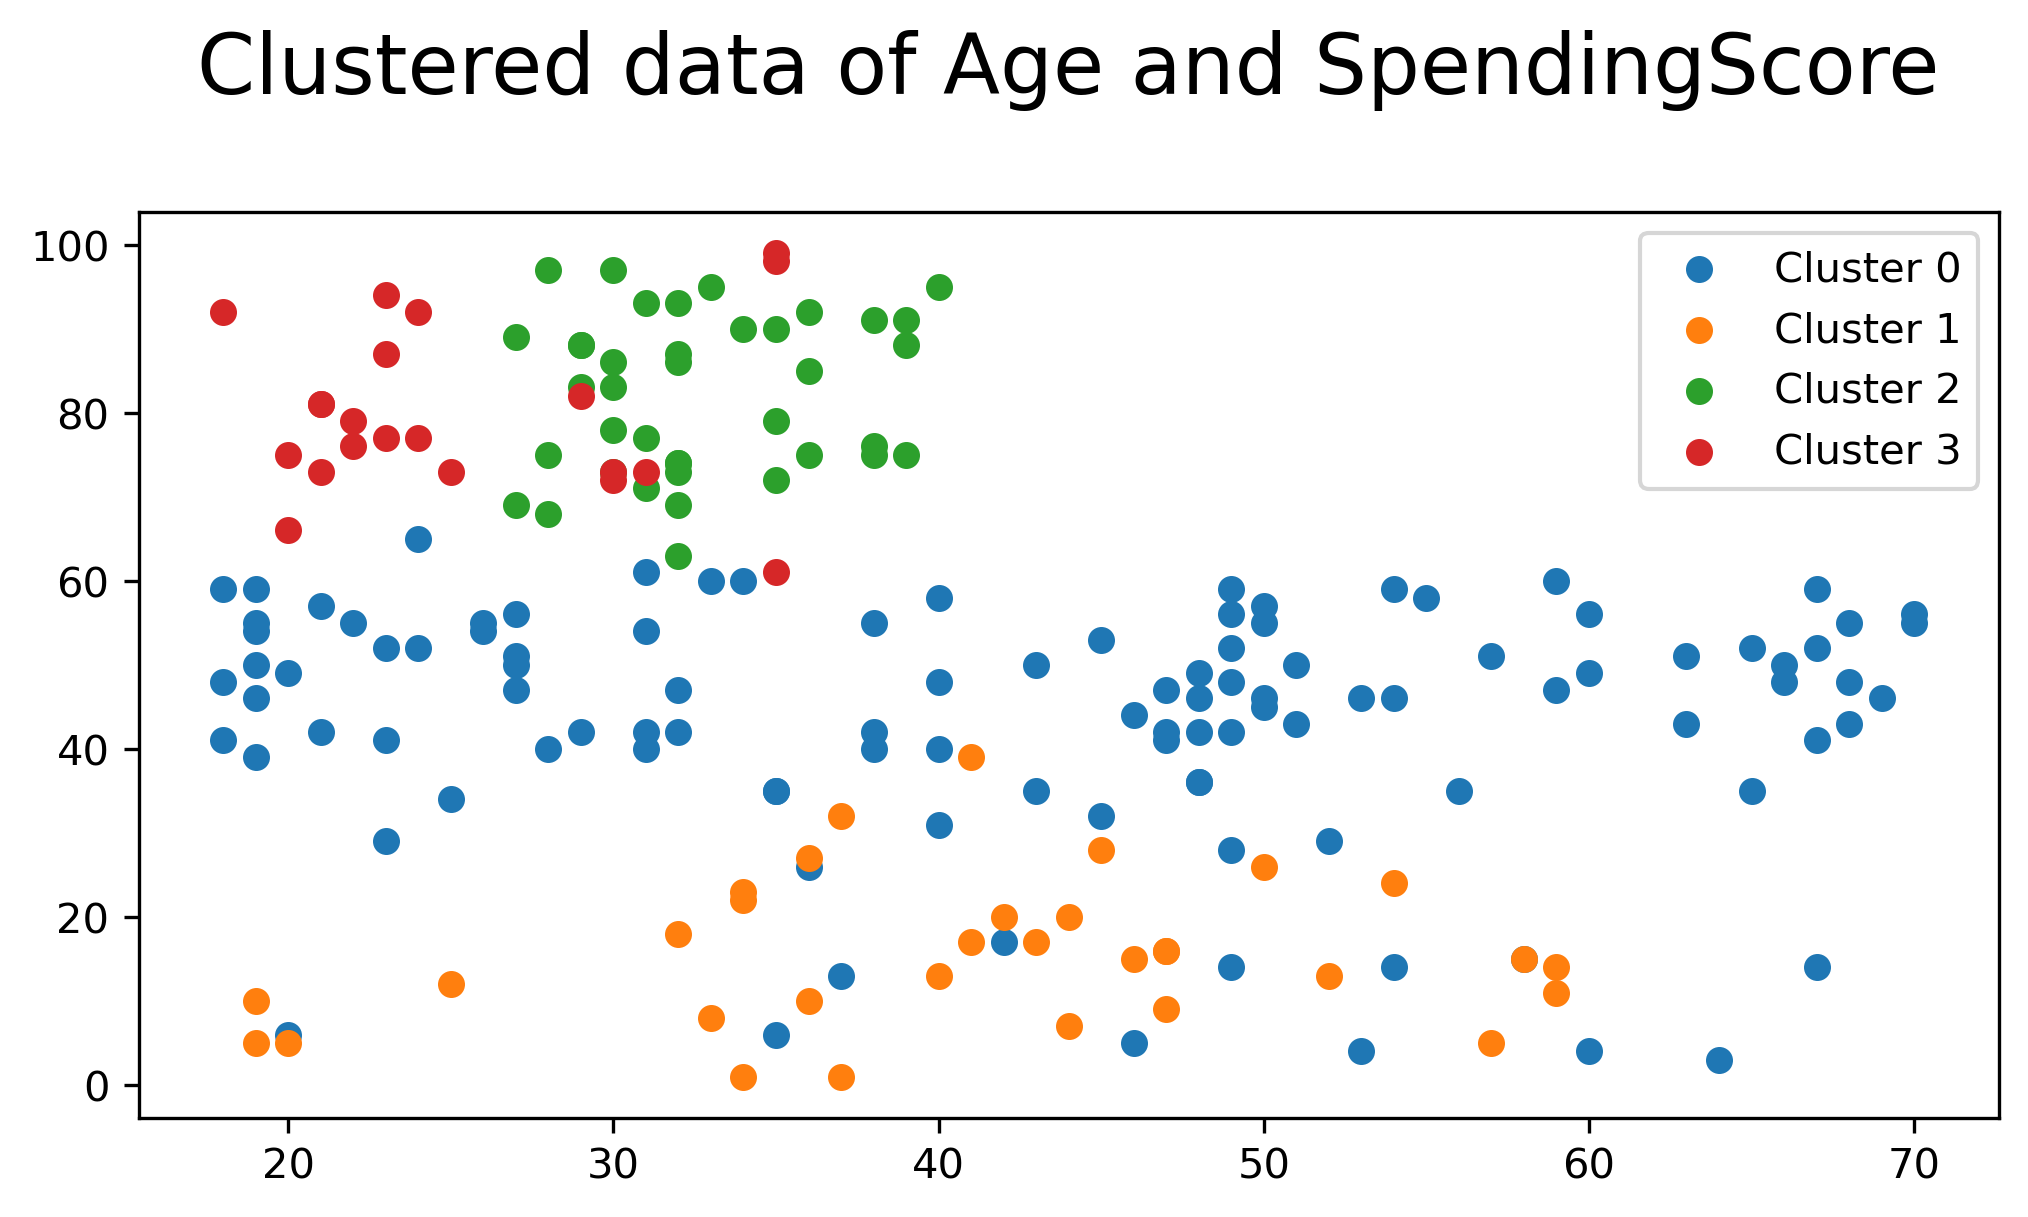

In [63]:
plot_clusters_hierarchical(age_v_spending, 4)

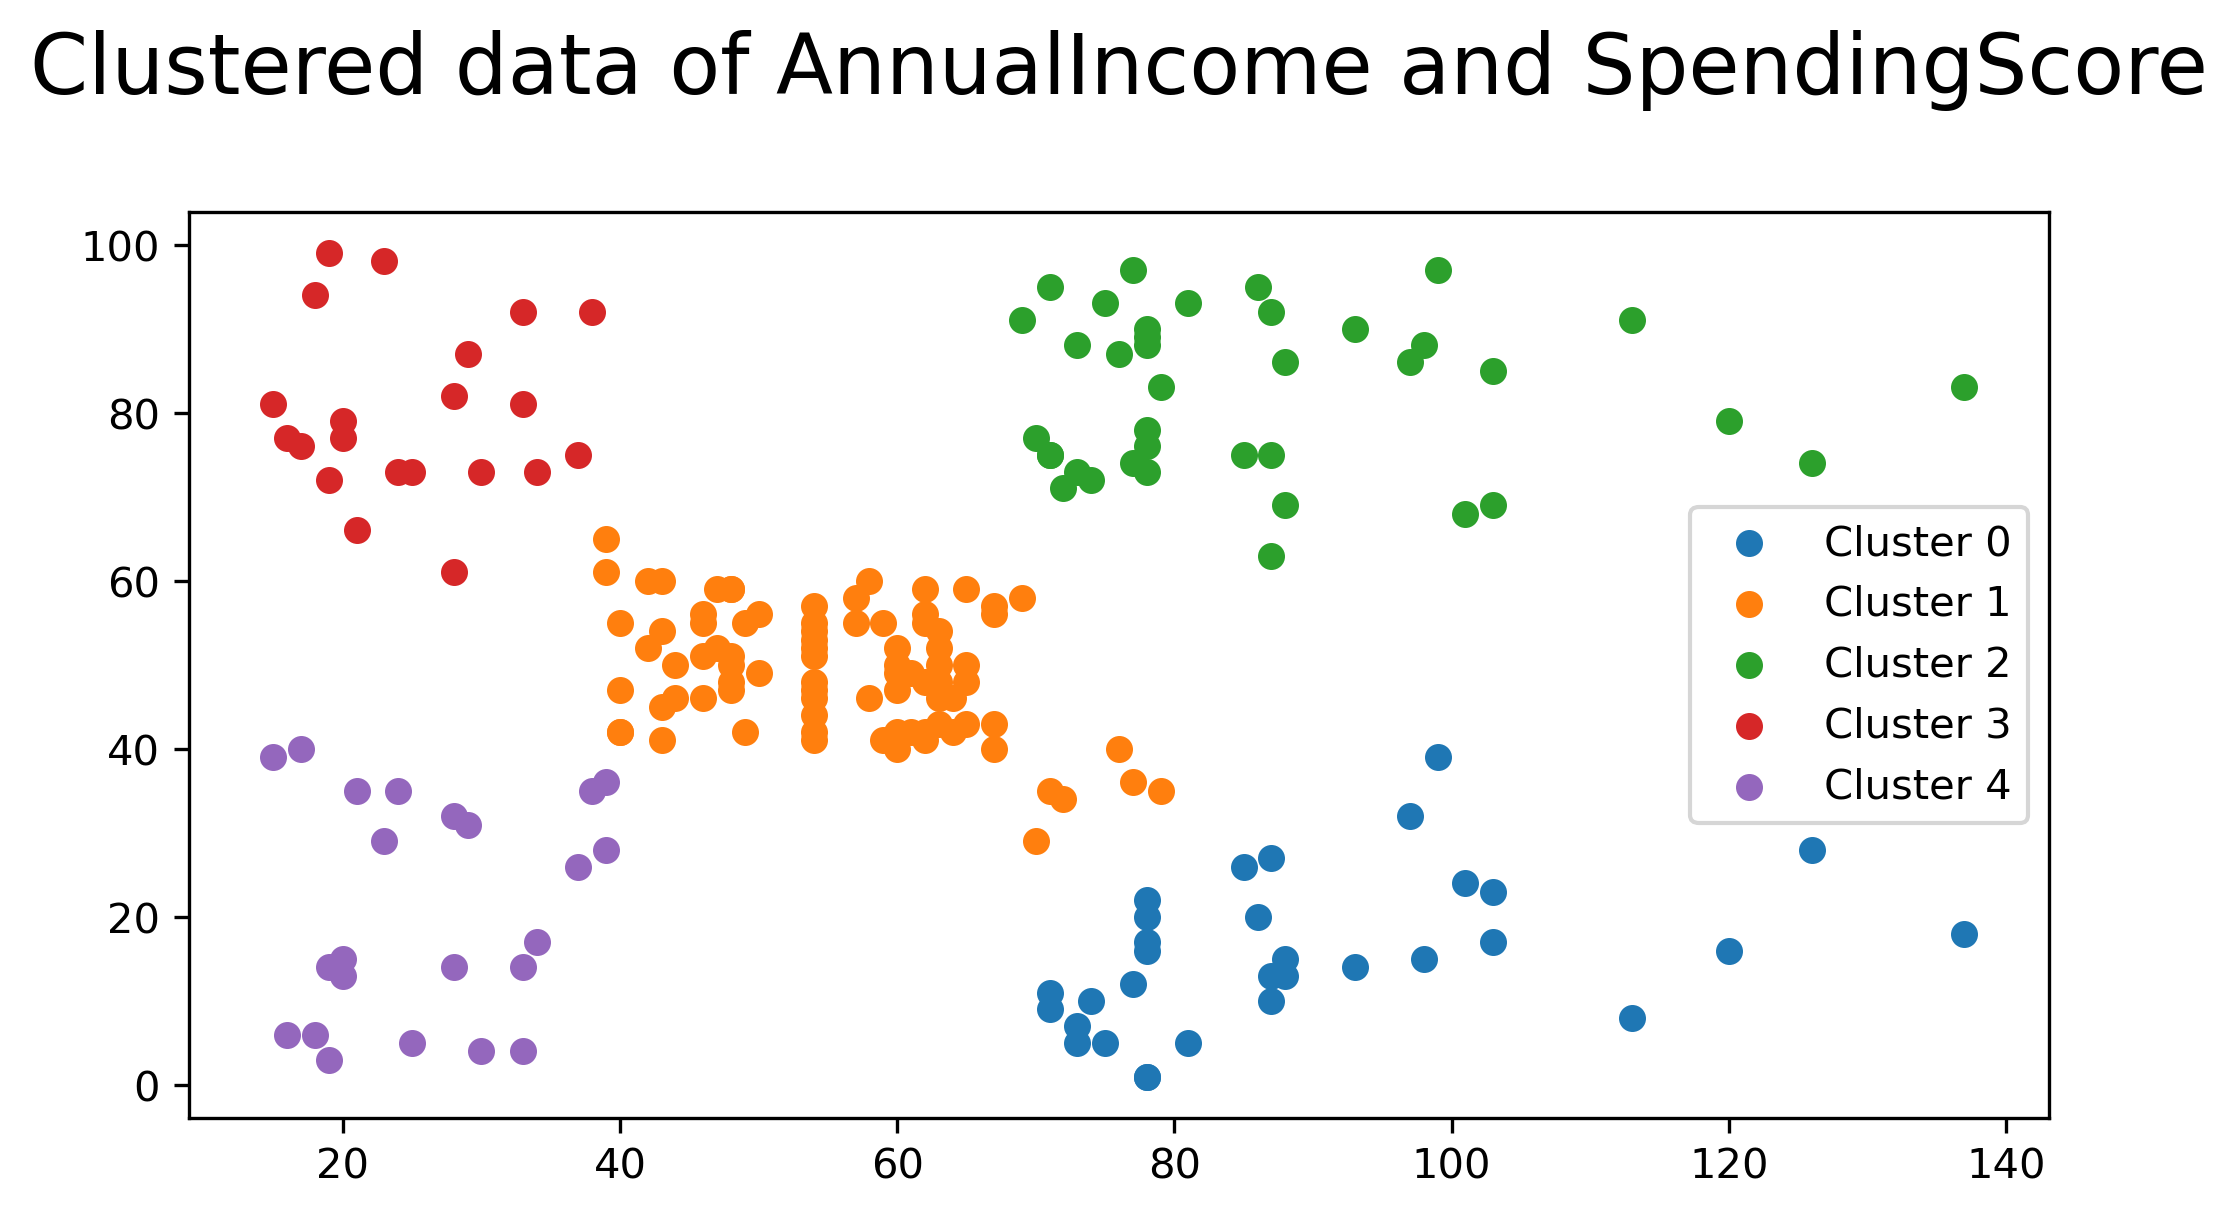

In [64]:
plot_clusters_hierarchical(income_v_spending, 5)

## Summary

As you can see Hierarchical Agglomerative clustering and k-Means algorithm has given us different results.